In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt


In [2]:
def load_results(path):
    """
    Helper method to read in and format the results from training convnets.
    returns dictionary of form:
    {
        'widths': np.array,
        'loss': np.array,
        'accuracy': np.array,
        'val_loss': np.array,
        'val_accuracy': np.array
    }
    """

    metrics = pkl.load(open(path, "rb"))

    # extract train/test loss and accuracy  for each model.
    widths = []
    train_losses = []
    train_accuracy = []
    test_losses = []
    test_accuracy = []

    for model_id, history in metrics.items():
        # all models are named in the form 'conv_net_depth_{depth}_width_{init_channels}'
        # or ResNet18_width_{width}_UniformHe_init.
        width = list(filter(lambda x: x.isnumeric(), model_id.split("_")))[-1]
        widths.append(int(width))

        train_losses.append(history.get("loss"))
        train_accuracy.append(history.get("accuracy"))
        test_losses.append(history.get("val_loss"))
        test_accuracy.append(history.get("val_accuracy"))

    train_losses = np.array(train_losses)
    train_accuracy = np.array(train_accuracy)
    test_losses = np.array(test_losses)
    test_accuracy = np.array(test_accuracy)

    return {
        "widths": widths,
        "loss": train_losses,
        "accuracy": train_accuracy,
        "val_loss": test_losses,
        "val_accuracy": test_accuracy,
    }

In [26]:
width_20_10000 = list(range(1,31))+[16 + 4*(i + 1) for i in range(3,12)] 
width_10_10000 = list(range(1,31))+[16 + 4*(i + 1) for i in range(3,12)] 
test_20_10000 = [0.6295,0.5570,0.589,0.609,0.602,0.579,0.567,0.5390,0.5075,0.502,0.487,0.493,0.4585,0.4420,0.4560,0.4250,0.4195,0.4280,0.3845,0.4090,0.394,0.394,0.372,0.392,0.389,0.377,0.37,0.374,0.359,0.3655,0.3548,0.3614,0.3340,0.3300,0.3147,0.3088,0.2899,0.2714,0.2689]
train_20_10000 = [0.632,0.4866,0.3533,0.2250,0.0854,0.1013,0.0,9.999999999998899e-05,0.0,0.0,0.0,0.0,0.0,0.0,9.999999999998899e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
width_10_10000 = list(range(1,46))
test_10_10000 = [0.65,0.55,0.5350,0.5735,0.5695,0.526,0.488,0.4875,0.4645,0.4400,0.4240,0.4210,0.4140,0.396,0.3965,0.3845,0.3735,0.364,0.359,0.3455,0.3445,0.3395,0.3425,0.3495,0.3380,0.349,0.3275,0.3240,0.3205,0.3255,0.3220,0.3199,0.3150,0.3144,0.3100,0.3048,0.3054,0.3055,0.3031,0.2947,0.2867,0.2900,0.2846,0.2784,0.2714]
train_10_10000 = [0.6183,0.4483,0.3135,0.265,0.0734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
width_0_10000=[(i + 1) for i in range(16)] + [16 + 4*(i + 1) for i in range(12)]
test_0_10000 = [0.618,0.527,0.5225,0.529,0.4805,0.4525,0.4320,0.396,0.3825,0.374,0.366,0.348,0.352,0.3380,0.3380,0.3220,0.3135,0.294,0.287,0.2785,0.271,0.284,0.2755,0.27,0.26,0.271,0.271,0.271]
train_0_10000 = [0.5778,0.3822,0.2894,0.2484,0.0079,0.0007,0.0,0.0007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

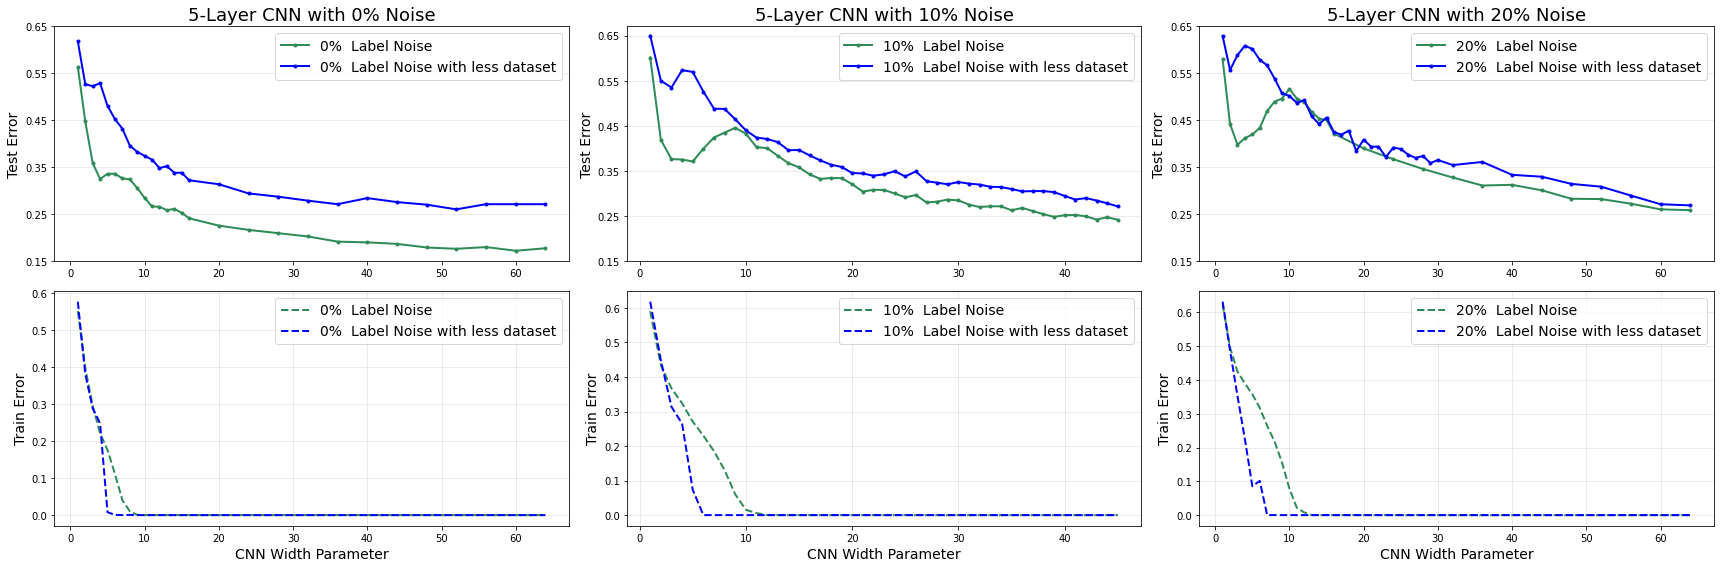

In [27]:
names=locals()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 8))
fs_label = 14
fs_title = 18

for axes_idx, noise in enumerate([0, 10, 20]):
    
    results = load_results(f"data\conv_nets_depth_5_{noise}pct_noise.pkl")


    train = results.get("accuracy")
    test = results.get("val_accuracy")

    test_plt = axes[0][axes_idx]
    train_plt = axes[1][axes_idx]
    # print(results["widths"])
    test_plt.plot(
        results["widths"][:45],
        (1 - test[:, -1])[:45],
        label=f"{noise}%  Label Noise",
        c="seagreen",
        lw=2,
        marker="o",
        ms=3,
    )
    test_plt.plot(
        names.get(f'width_{noise}_10000'),
        names.get(f'test_{noise}_10000'),
        label=f"{noise}%  Label Noise with less dataset",
        c="blue",
        lw=2,
        marker="o",
        ms=3,
    )
    test_plt.set_title(
        f"5-Layer CNN with {noise}% Noise", fontsize=fs_title
    )
    test_plt.legend(fontsize=14)
    test_plt.set_ylabel("Test Error", fontsize=fs_label)
    # test_plt.axvline(4,ls='-.', c="blue", lw=1,alpha=0.5)
    # test_plt.axvline(10,ls='-.', c="seagreen", lw=1,alpha=0.5)

    train_plt.plot(
        results["widths"][:45], (1 - train)[:, -1][:45], c="seagreen", lw=2, ls="--", label=f"{noise}%  Label Noise"
    )
    train_plt.plot(
        names.get(f'width_{noise}_10000'), names.get(f'train_{noise}_10000'), c="blue", lw=2, ls="--", label=f"{noise}%  Label Noise with less dataset"
    )
    train_plt.set_xlabel("CNN Width Parameter", fontsize=fs_label)
    train_plt.set_ylabel("Train Error", fontsize=fs_label)
    train_plt.legend(fontsize=14)
    train_plt.grid(alpha=0.3)
    # train_plt.axvline(4,ls='-.', c="blue", lw=1,alpha=0.5)
    # train_plt.axvline(10,ls='-.', c="seagreen", lw=1,alpha=0.5)

    test_plt.grid(alpha=0.3, axis='y')
    test_plt.set_yticks([0.15 + i*0.1 for i in range(6)])

fig.tight_layout()
plt.show()

In [22]:
width_5_20 = list(range(1,31))+[16 + 4*(i + 1) for i in range(3,12)] 
test_5_20 = [0.6295,0.5570,0.589,0.609,0.602,0.579,0.567,0.5390,0.5075,0.502,0.487,0.493,0.4585,0.4420,0.4560,0.4250,0.4195,0.4280,0.3845,0.4090,0.394,0.394,0.372,0.392,0.389,0.377,0.37,0.374,0.359,0.3655,0.3548,0.3614,0.3340,0.3300,0.3147,0.3088,0.2899,0.2714,0.2689]
train_5_20 = [0.632,0.4866,0.3533,0.2250,0.0854,0.1013,0.0,9.999999999998899e-05,0.0,0.0,0.0,0.0,0.0,0.0,9.999999999998899e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

width_3_20 = [1, 2] + [4 * (i+1) for i in range(7)] + [32 + 16*(i) for i in range(7)] + [192, 256]
train_3_20 = [0.7233,0.6047,0.5093,0.45589999999999997,0.3879,0.3501,0.240769999999999995,0.09260000000000002,0.04690000000000005,0.0017000000000000348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
test_3_20 = [0.6905,0.57,0.495,0.516,0.523,0.5835,0.607,0.5569999999999999, 0.552,0.532,0.5015000000000001,0.4535,0.45599999999999996,0.43600000000000005,0.41900000000000004,0.408,0.390,0.362]

width_7_20 = [1 + i for i in range(16)] 
train_7_20 = [0.2589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
test_7_20 = [0.6075,0.489,0.4625,0.4400,0.3995,0.3675,0.376,0.3565,0.365,0.3505,0.353,0.35,0.36,0.3310,0.3645,0.3370]

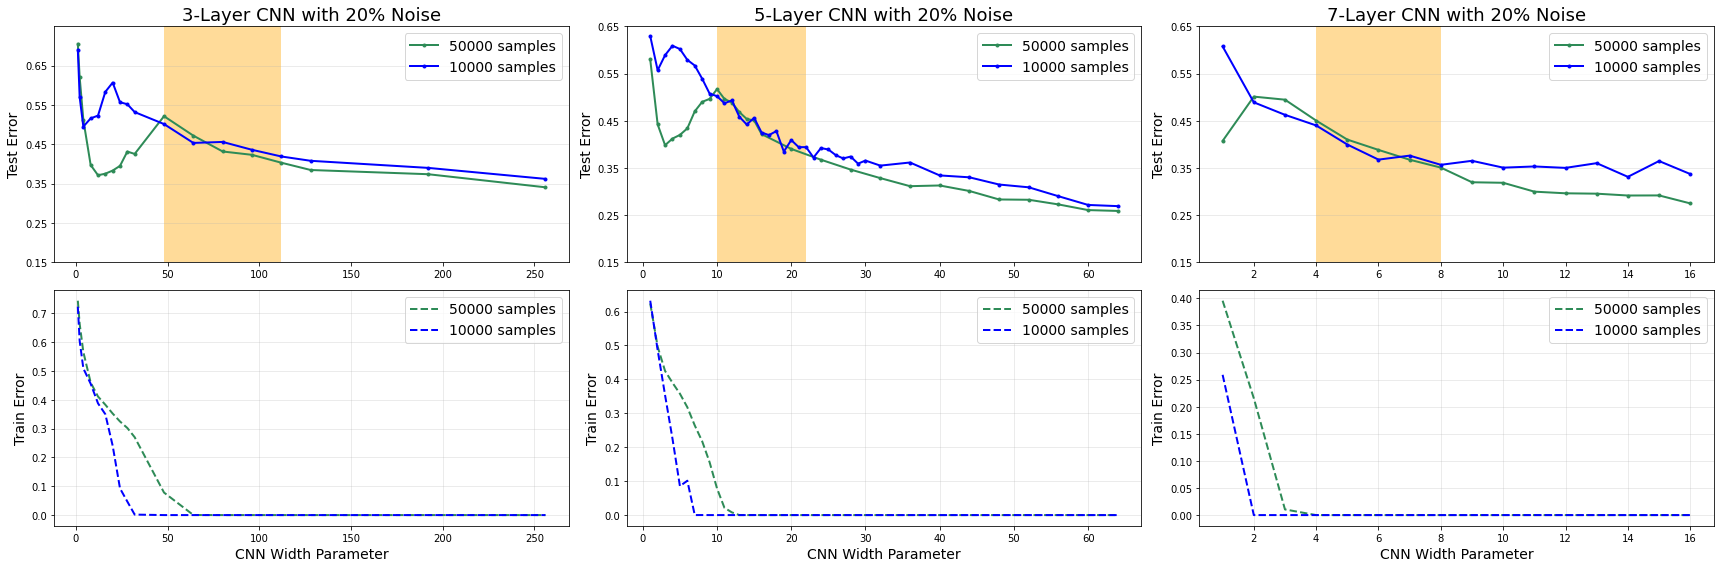

In [23]:
names=locals()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 8))
fs_label = 14
fs_title = 18

for axes_idx, width in enumerate([3, 5, 7]):
    
    results = load_results(f"data\conv_nets_depth_{width}_20pct_noise.pkl")


    train = results.get("accuracy")
    test = results.get("val_accuracy")

    test_plt = axes[0][axes_idx]
    train_plt = axes[1][axes_idx]
    # print(results["widths"])
    test_plt.plot(
        results["widths"],
        (1 - test[:, -1]),
        label=f"50000 samples",
        c="seagreen",
        lw=2,
        marker="o",
        ms=3,
    )
    test_plt.plot(
        names.get(f'width_{width}_20'),
        names.get(f'test_{width}_20'),
        label=f"10000 samples",
        c="blue",
        lw=2,
        marker="o",
        ms=3,
    )
    test_plt.set_title(
        f"{width}-Layer CNN with 20% Noise", fontsize=fs_title
    )
    test_plt.legend(fontsize=14)
    test_plt.set_ylabel("Test Error", fontsize=fs_label)
    if width == 3:
        test_plt.fill_between([48,112],0,1,facecolor="orange",alpha=0.4)
    if width == 5:
        test_plt.fill_between([10,22],0,1,facecolor="orange",alpha=0.4)
    if width == 7:
        test_plt.fill_between([4,8],0,1,facecolor="orange",alpha=0.4)
    # test_plt.axvline(4,ls='-.', c="blue", lw=1,alpha=0.5)
    # test_plt.axvline(10,ls='-.', c="seagreen", lw=1,alpha=0.5)

    train_plt.plot(
        results["widths"], (1 - train)[:, -1], c="seagreen", lw=2, ls="--", label=f"50000 samples"
    )
    train_plt.plot(
        names.get(f'width_{width}_20'), names.get(f'train_{width}_20'), c="blue", lw=2, ls="--", label=f"10000 samples"
    )
    train_plt.set_xlabel("CNN Width Parameter", fontsize=fs_label)
    train_plt.set_ylabel("Train Error", fontsize=fs_label)
    train_plt.legend(fontsize=14)
    train_plt.grid(alpha=0.3)
    # train_plt.axvline(4,ls='-.', c="blue", lw=1,alpha=0.5)
    # train_plt.axvline(10,ls='-.', c="seagreen", lw=1,alpha=0.5)

    test_plt.grid(alpha=0.3, axis='y')
    test_plt.set_yticks([0.15 + i*0.1 for i in range(6)])
    if width == 3:
        test_plt.set_ylim(ymin = 0.15, ymax = 0.75)
    else:
        test_plt.set_ylim(ymin = 0.15, ymax = 0.65)

fig.tight_layout()
plt.show()

In [13]:
width=[(i + 1) for i in range(16)] + [16 + 4*(i + 1) for i in range(12)]
GaussianNoise_test=[0.6425,0.5525,0.518,0.511,0.488,0.4680,0.477,0.4530,0.4390,0.4380,0.4085,0.3925,0.3945,0.3985,0.3675,0.385,0.354,0.3475,0.3535,0.333,0.331,0.324,0.324,0.326,0.318,0.314,0.302,0.308]
GaussianNoise_train=[0.5983,0.4577,0.3539,0.2867,0.1922,0.0998,0.0561,0.0201,0.026,0.00420,0.00314,0.002299,0.0011999,0.0002999,0.00029999,0.00039999,9.999999999998899e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
original_test = [0.618,0.527,0.5225,0.529,0.4805,0.4525,0.4320,0.396,0.3825,0.374,0.366,0.348,0.352,0.3380,0.3380,0.3220,0.3135,0.294,0.287,0.2785,0.271,0.284,0.2755,0.27,0.26,0.271,0.271,0.271]
original_train = [0.5778,0.3822,0.2894,0.2484,0.0079,0.0007,0.0,0.0007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

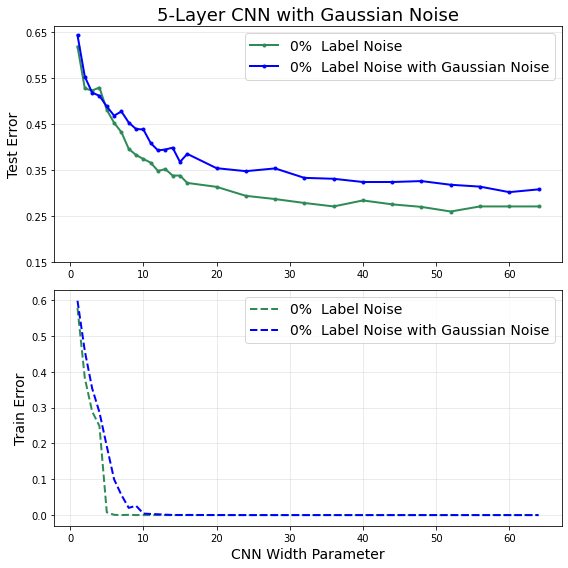

In [14]:
names=locals()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fs_label = 14
fs_title = 18

for axes_idx, noise in enumerate([0]):
    
    results = load_results(f"data\conv_nets_depth_5_{noise}pct_noise.pkl")


    train = results.get("accuracy")
    test = results.get("val_accuracy")

    test_plt = axes[0]
    train_plt = axes[1]

    test_plt.plot(
        width,
        original_test,
        label=f"{noise}%  Label Noise",
        c="seagreen",
        lw=2,
        marker="o",
        ms=3,
    )
    test_plt.plot(
        width,
        GaussianNoise_test,
        label=f"{noise}%  Label Noise with Gaussian Noise",
        c="blue",
        lw=2,
        marker="o",
        ms=3,
    )

    test_plt.set_title(
        f"5-Layer CNN with Gaussian Noise", fontsize=fs_title
    )
    test_plt.legend(fontsize=14)
    test_plt.set_ylabel("Test Error", fontsize=fs_label)
    # test_plt.axvline(4,ls='-.', c="blue", lw=1,alpha=0.5)
    # test_plt.axvline(10,ls='-.', c="seagreen", lw=1,alpha=0.5)

    # train_plt.axvline(4,ls='-.', c="blue", lw=1,alpha=0.5)
    # train_plt.axvline(10,ls='-.', c="seagreen", lw=1,alpha=0.5)
    train_plt.plot(
        results["widths"], original_train, c="seagreen", lw=2, ls="--", label=f"{noise}%  Label Noise"
    )
    train_plt.plot(
        width, GaussianNoise_train, c="blue", lw=2, ls="--", label=f"{noise}%  Label Noise with Gaussian Noise"
    )
    train_plt.set_xlabel("CNN Width Parameter", fontsize=fs_label)
    train_plt.set_ylabel("Train Error", fontsize=fs_label)
    train_plt.legend(fontsize=14)
    train_plt.grid(alpha=0.3)
    test_plt.grid(alpha=0.3, axis='y')
    test_plt.set_yticks([0.15 + i*0.1 for i in range(6)])

fig.tight_layout()
plt.show()